In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

import os 

In [2]:
save_path = ('figures/1a3c')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_CLASSES = 3

l_r = 0.01
epochs = 1000
batch_size = 8
num_neurons = 20

seed = 10

In [5]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
histories = {}

In [7]:
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')

X, Y = train_input[1:, :21], train_input[1:,-1].astype(int)

X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
Y = Y-1

no_data = len(X)

idx = np.arange(no_data)
np.random.shuffle(idx)
trainX, trainY= X[idx],Y[idx]

In [8]:
testX = trainX[-638:]
testY = trainY[-638:]

trainX = trainX[:1488]
trainY = trainY[:1488]

no_data = len(testX)
print(no_data)

638


In [9]:
# create the model
starter_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(0.000001)),
        keras.layers.Dense(NUM_CLASSES, activation='softmax')])

In [10]:
starter_model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# train the model
histories['starter'] =starter_model.fit(trainX, trainY,
                                        epochs=epochs,
                                        verbose = 2,
                                        batch_size=batch_size,
                                        validation_data=(testX,testY))

Epoch 1/1000
186/186 - 0s - loss: 0.7265 - accuracy: 0.7708 - val_loss: 0.6300 - val_accuracy: 0.7853
Epoch 2/1000
186/186 - 0s - loss: 0.6264 - accuracy: 0.7755 - val_loss: 0.5985 - val_accuracy: 0.7853
Epoch 3/1000
186/186 - 0s - loss: 0.5968 - accuracy: 0.7755 - val_loss: 0.5691 - val_accuracy: 0.7853
Epoch 4/1000
186/186 - 0s - loss: 0.5685 - accuracy: 0.7755 - val_loss: 0.5412 - val_accuracy: 0.7853
Epoch 5/1000
186/186 - 0s - loss: 0.5410 - accuracy: 0.7755 - val_loss: 0.5177 - val_accuracy: 0.7853
Epoch 6/1000
186/186 - 0s - loss: 0.5162 - accuracy: 0.7782 - val_loss: 0.4902 - val_accuracy: 0.8009
Epoch 7/1000
186/186 - 0s - loss: 0.4930 - accuracy: 0.7849 - val_loss: 0.4643 - val_accuracy: 0.8119
Epoch 8/1000
186/186 - 0s - loss: 0.4717 - accuracy: 0.7950 - val_loss: 0.4428 - val_accuracy: 0.8213
Epoch 9/1000
186/186 - 0s - loss: 0.4520 - accuracy: 0.8044 - val_loss: 0.4228 - val_accuracy: 0.8339
Epoch 10/1000
186/186 - 0s - loss: 0.4346 - accuracy: 0.8145 - val_loss: 0.4056 - 

Epoch 81/1000
186/186 - 0s - loss: 0.2476 - accuracy: 0.8911 - val_loss: 0.2592 - val_accuracy: 0.8997
Epoch 82/1000
186/186 - 0s - loss: 0.2477 - accuracy: 0.8952 - val_loss: 0.2528 - val_accuracy: 0.8966
Epoch 83/1000
186/186 - 0s - loss: 0.2479 - accuracy: 0.8938 - val_loss: 0.2505 - val_accuracy: 0.8966
Epoch 84/1000
186/186 - 0s - loss: 0.2473 - accuracy: 0.8945 - val_loss: 0.2556 - val_accuracy: 0.9013
Epoch 85/1000
186/186 - 0s - loss: 0.2447 - accuracy: 0.8945 - val_loss: 0.2533 - val_accuracy: 0.8997
Epoch 86/1000
186/186 - 0s - loss: 0.2468 - accuracy: 0.8972 - val_loss: 0.2517 - val_accuracy: 0.8997
Epoch 87/1000
186/186 - 0s - loss: 0.2460 - accuracy: 0.8978 - val_loss: 0.2522 - val_accuracy: 0.8981
Epoch 88/1000
186/186 - 0s - loss: 0.2452 - accuracy: 0.8911 - val_loss: 0.2488 - val_accuracy: 0.8966
Epoch 89/1000
186/186 - 0s - loss: 0.2451 - accuracy: 0.8918 - val_loss: 0.2496 - val_accuracy: 0.8981
Epoch 90/1000
186/186 - 0s - loss: 0.2447 - accuracy: 0.8972 - val_loss: 

Epoch 160/1000
186/186 - 0s - loss: 0.2287 - accuracy: 0.8985 - val_loss: 0.2342 - val_accuracy: 0.8981
Epoch 161/1000
186/186 - 0s - loss: 0.2298 - accuracy: 0.8978 - val_loss: 0.2344 - val_accuracy: 0.9028
Epoch 162/1000
186/186 - 0s - loss: 0.2289 - accuracy: 0.9039 - val_loss: 0.2350 - val_accuracy: 0.8997
Epoch 163/1000
186/186 - 0s - loss: 0.2286 - accuracy: 0.9026 - val_loss: 0.2441 - val_accuracy: 0.8997
Epoch 164/1000
186/186 - 0s - loss: 0.2291 - accuracy: 0.9052 - val_loss: 0.2336 - val_accuracy: 0.9060
Epoch 165/1000
186/186 - 0s - loss: 0.2291 - accuracy: 0.9026 - val_loss: 0.2338 - val_accuracy: 0.9044
Epoch 166/1000
186/186 - 0s - loss: 0.2287 - accuracy: 0.9019 - val_loss: 0.2399 - val_accuracy: 0.8934
Epoch 167/1000
186/186 - 0s - loss: 0.2282 - accuracy: 0.9019 - val_loss: 0.2342 - val_accuracy: 0.9028
Epoch 168/1000
186/186 - 0s - loss: 0.2281 - accuracy: 0.9012 - val_loss: 0.2340 - val_accuracy: 0.9060
Epoch 169/1000
186/186 - 0s - loss: 0.2285 - accuracy: 0.9019 - 

Epoch 239/1000
186/186 - 0s - loss: 0.2179 - accuracy: 0.8999 - val_loss: 0.2308 - val_accuracy: 0.9028
Epoch 240/1000
186/186 - 0s - loss: 0.2162 - accuracy: 0.9052 - val_loss: 0.2258 - val_accuracy: 0.9013
Epoch 241/1000
186/186 - 0s - loss: 0.2164 - accuracy: 0.9086 - val_loss: 0.2234 - val_accuracy: 0.9107
Epoch 242/1000
186/186 - 0s - loss: 0.2175 - accuracy: 0.9086 - val_loss: 0.2246 - val_accuracy: 0.9091
Epoch 243/1000
186/186 - 0s - loss: 0.2164 - accuracy: 0.9005 - val_loss: 0.2295 - val_accuracy: 0.8981
Epoch 244/1000
186/186 - 0s - loss: 0.2180 - accuracy: 0.9086 - val_loss: 0.2235 - val_accuracy: 0.9075
Epoch 245/1000
186/186 - 0s - loss: 0.2167 - accuracy: 0.9059 - val_loss: 0.2239 - val_accuracy: 0.9044
Epoch 246/1000
186/186 - 0s - loss: 0.2176 - accuracy: 0.9046 - val_loss: 0.2271 - val_accuracy: 0.8966
Epoch 247/1000
186/186 - 0s - loss: 0.2170 - accuracy: 0.9099 - val_loss: 0.2235 - val_accuracy: 0.8997
Epoch 248/1000
186/186 - 0s - loss: 0.2164 - accuracy: 0.9019 - 

Epoch 318/1000
186/186 - 0s - loss: 0.2068 - accuracy: 0.9079 - val_loss: 0.2171 - val_accuracy: 0.9028
Epoch 319/1000
186/186 - 0s - loss: 0.2073 - accuracy: 0.9120 - val_loss: 0.2178 - val_accuracy: 0.9028
Epoch 320/1000
186/186 - 0s - loss: 0.2066 - accuracy: 0.9066 - val_loss: 0.2162 - val_accuracy: 0.9044
Epoch 321/1000
186/186 - 0s - loss: 0.2057 - accuracy: 0.9099 - val_loss: 0.2201 - val_accuracy: 0.9075
Epoch 322/1000
186/186 - 0s - loss: 0.2047 - accuracy: 0.9120 - val_loss: 0.2190 - val_accuracy: 0.9044
Epoch 323/1000
186/186 - 0s - loss: 0.2064 - accuracy: 0.9066 - val_loss: 0.2177 - val_accuracy: 0.9075
Epoch 324/1000
186/186 - 0s - loss: 0.2057 - accuracy: 0.9113 - val_loss: 0.2226 - val_accuracy: 0.9013
Epoch 325/1000
186/186 - 0s - loss: 0.2060 - accuracy: 0.9133 - val_loss: 0.2158 - val_accuracy: 0.9075
Epoch 326/1000
186/186 - 0s - loss: 0.2042 - accuracy: 0.9086 - val_loss: 0.2170 - val_accuracy: 0.9044
Epoch 327/1000
186/186 - 0s - loss: 0.2055 - accuracy: 0.9113 - 

Epoch 397/1000
186/186 - 0s - loss: 0.1950 - accuracy: 0.9113 - val_loss: 0.2087 - val_accuracy: 0.9122
Epoch 398/1000
186/186 - 0s - loss: 0.1948 - accuracy: 0.9120 - val_loss: 0.2119 - val_accuracy: 0.9075
Epoch 399/1000
186/186 - 0s - loss: 0.1955 - accuracy: 0.9113 - val_loss: 0.2146 - val_accuracy: 0.9075
Epoch 400/1000
186/186 - 0s - loss: 0.1946 - accuracy: 0.9160 - val_loss: 0.2122 - val_accuracy: 0.9107
Epoch 401/1000
186/186 - 0s - loss: 0.1940 - accuracy: 0.9120 - val_loss: 0.2174 - val_accuracy: 0.9107
Epoch 402/1000
186/186 - 0s - loss: 0.1937 - accuracy: 0.9180 - val_loss: 0.2151 - val_accuracy: 0.9028
Epoch 403/1000
186/186 - 0s - loss: 0.1935 - accuracy: 0.9140 - val_loss: 0.2082 - val_accuracy: 0.9138
Epoch 404/1000
186/186 - 0s - loss: 0.1941 - accuracy: 0.9160 - val_loss: 0.2088 - val_accuracy: 0.9107
Epoch 405/1000
186/186 - 0s - loss: 0.1935 - accuracy: 0.9153 - val_loss: 0.2134 - val_accuracy: 0.9028
Epoch 406/1000
186/186 - 0s - loss: 0.1959 - accuracy: 0.9120 - 

Epoch 476/1000
186/186 - 0s - loss: 0.1845 - accuracy: 0.9194 - val_loss: 0.2081 - val_accuracy: 0.9091
Epoch 477/1000
186/186 - 0s - loss: 0.1877 - accuracy: 0.9167 - val_loss: 0.2045 - val_accuracy: 0.9122
Epoch 478/1000
186/186 - 0s - loss: 0.1863 - accuracy: 0.9227 - val_loss: 0.2045 - val_accuracy: 0.9138
Epoch 479/1000
186/186 - 0s - loss: 0.1861 - accuracy: 0.9180 - val_loss: 0.2214 - val_accuracy: 0.9013
Epoch 480/1000
186/186 - 0s - loss: 0.1867 - accuracy: 0.9173 - val_loss: 0.2150 - val_accuracy: 0.9044
Epoch 481/1000
186/186 - 0s - loss: 0.1863 - accuracy: 0.9126 - val_loss: 0.2129 - val_accuracy: 0.9060
Epoch 482/1000
186/186 - 0s - loss: 0.1858 - accuracy: 0.9187 - val_loss: 0.2031 - val_accuracy: 0.9201
Epoch 483/1000
186/186 - 0s - loss: 0.1851 - accuracy: 0.9187 - val_loss: 0.2083 - val_accuracy: 0.9075
Epoch 484/1000
186/186 - 0s - loss: 0.1860 - accuracy: 0.9180 - val_loss: 0.2165 - val_accuracy: 0.9044
Epoch 485/1000
186/186 - 0s - loss: 0.1860 - accuracy: 0.9220 - 

Epoch 555/1000
186/186 - 0s - loss: 0.1803 - accuracy: 0.9254 - val_loss: 0.1996 - val_accuracy: 0.9169
Epoch 556/1000
186/186 - 0s - loss: 0.1796 - accuracy: 0.9194 - val_loss: 0.2024 - val_accuracy: 0.9122
Epoch 557/1000
186/186 - 0s - loss: 0.1771 - accuracy: 0.9247 - val_loss: 0.2002 - val_accuracy: 0.9185
Epoch 558/1000
186/186 - 0s - loss: 0.1783 - accuracy: 0.9227 - val_loss: 0.2018 - val_accuracy: 0.9107
Epoch 559/1000
186/186 - 0s - loss: 0.1788 - accuracy: 0.9241 - val_loss: 0.1991 - val_accuracy: 0.9154
Epoch 560/1000
186/186 - 0s - loss: 0.1793 - accuracy: 0.9234 - val_loss: 0.2002 - val_accuracy: 0.9185
Epoch 561/1000
186/186 - 0s - loss: 0.1793 - accuracy: 0.9234 - val_loss: 0.2007 - val_accuracy: 0.9122
Epoch 562/1000
186/186 - 0s - loss: 0.1789 - accuracy: 0.9227 - val_loss: 0.1999 - val_accuracy: 0.9185
Epoch 563/1000
186/186 - 0s - loss: 0.1793 - accuracy: 0.9227 - val_loss: 0.2028 - val_accuracy: 0.9107
Epoch 564/1000
186/186 - 0s - loss: 0.1794 - accuracy: 0.9187 - 

Epoch 634/1000
186/186 - 0s - loss: 0.1730 - accuracy: 0.9288 - val_loss: 0.1996 - val_accuracy: 0.9185
Epoch 635/1000
186/186 - 0s - loss: 0.1736 - accuracy: 0.9220 - val_loss: 0.1973 - val_accuracy: 0.9169
Epoch 636/1000
186/186 - 0s - loss: 0.1719 - accuracy: 0.9254 - val_loss: 0.2023 - val_accuracy: 0.9107
Epoch 637/1000
186/186 - 0s - loss: 0.1730 - accuracy: 0.9207 - val_loss: 0.2022 - val_accuracy: 0.9091
Epoch 638/1000
186/186 - 0s - loss: 0.1744 - accuracy: 0.9288 - val_loss: 0.2003 - val_accuracy: 0.9122
Epoch 639/1000
186/186 - 0s - loss: 0.1729 - accuracy: 0.9308 - val_loss: 0.1979 - val_accuracy: 0.9169
Epoch 640/1000
186/186 - 0s - loss: 0.1726 - accuracy: 0.9267 - val_loss: 0.2123 - val_accuracy: 0.8997
Epoch 641/1000
186/186 - 0s - loss: 0.1742 - accuracy: 0.9214 - val_loss: 0.1987 - val_accuracy: 0.9138
Epoch 642/1000
186/186 - 0s - loss: 0.1708 - accuracy: 0.9274 - val_loss: 0.1990 - val_accuracy: 0.9169
Epoch 643/1000
186/186 - 0s - loss: 0.1737 - accuracy: 0.9274 - 

Epoch 713/1000
186/186 - 0s - loss: 0.1683 - accuracy: 0.9281 - val_loss: 0.1986 - val_accuracy: 0.9138
Epoch 714/1000
186/186 - 0s - loss: 0.1696 - accuracy: 0.9214 - val_loss: 0.1944 - val_accuracy: 0.9201
Epoch 715/1000
186/186 - 0s - loss: 0.1688 - accuracy: 0.9194 - val_loss: 0.1990 - val_accuracy: 0.9185
Epoch 716/1000
186/186 - 0s - loss: 0.1697 - accuracy: 0.9274 - val_loss: 0.1965 - val_accuracy: 0.9154
Epoch 717/1000
186/186 - 0s - loss: 0.1669 - accuracy: 0.9288 - val_loss: 0.1972 - val_accuracy: 0.9154
Epoch 718/1000
186/186 - 0s - loss: 0.1686 - accuracy: 0.9241 - val_loss: 0.2050 - val_accuracy: 0.9044
Epoch 719/1000
186/186 - 0s - loss: 0.1673 - accuracy: 0.9301 - val_loss: 0.1980 - val_accuracy: 0.9169
Epoch 720/1000
186/186 - 0s - loss: 0.1694 - accuracy: 0.9267 - val_loss: 0.1950 - val_accuracy: 0.9154
Epoch 721/1000
186/186 - 0s - loss: 0.1684 - accuracy: 0.9274 - val_loss: 0.1926 - val_accuracy: 0.9169
Epoch 722/1000
186/186 - 0s - loss: 0.1657 - accuracy: 0.9274 - 

Epoch 792/1000
186/186 - 0s - loss: 0.1661 - accuracy: 0.9261 - val_loss: 0.1949 - val_accuracy: 0.9169
Epoch 793/1000
186/186 - 0s - loss: 0.1639 - accuracy: 0.9254 - val_loss: 0.1957 - val_accuracy: 0.9138
Epoch 794/1000
186/186 - 0s - loss: 0.1653 - accuracy: 0.9294 - val_loss: 0.1951 - val_accuracy: 0.9201
Epoch 795/1000
186/186 - 0s - loss: 0.1627 - accuracy: 0.9294 - val_loss: 0.1951 - val_accuracy: 0.9201
Epoch 796/1000
186/186 - 0s - loss: 0.1645 - accuracy: 0.9281 - val_loss: 0.1926 - val_accuracy: 0.9232
Epoch 797/1000
186/186 - 0s - loss: 0.1645 - accuracy: 0.9267 - val_loss: 0.1938 - val_accuracy: 0.9201
Epoch 798/1000
186/186 - 0s - loss: 0.1638 - accuracy: 0.9308 - val_loss: 0.2059 - val_accuracy: 0.9185
Epoch 799/1000
186/186 - 0s - loss: 0.1653 - accuracy: 0.9234 - val_loss: 0.2006 - val_accuracy: 0.9107
Epoch 800/1000
186/186 - 0s - loss: 0.1658 - accuracy: 0.9261 - val_loss: 0.1927 - val_accuracy: 0.9154
Epoch 801/1000
186/186 - 0s - loss: 0.1633 - accuracy: 0.9288 - 

Epoch 871/1000
186/186 - 0s - loss: 0.1615 - accuracy: 0.9281 - val_loss: 0.1914 - val_accuracy: 0.9154
Epoch 872/1000
186/186 - 0s - loss: 0.1627 - accuracy: 0.9261 - val_loss: 0.1915 - val_accuracy: 0.9154
Epoch 873/1000
186/186 - 0s - loss: 0.1594 - accuracy: 0.9281 - val_loss: 0.1983 - val_accuracy: 0.9122
Epoch 874/1000
186/186 - 0s - loss: 0.1640 - accuracy: 0.9315 - val_loss: 0.1938 - val_accuracy: 0.9107
Epoch 875/1000
186/186 - 0s - loss: 0.1621 - accuracy: 0.9301 - val_loss: 0.1933 - val_accuracy: 0.9216
Epoch 876/1000
186/186 - 0s - loss: 0.1611 - accuracy: 0.9348 - val_loss: 0.1944 - val_accuracy: 0.9232
Epoch 877/1000
186/186 - 0s - loss: 0.1619 - accuracy: 0.9315 - val_loss: 0.1932 - val_accuracy: 0.9216
Epoch 878/1000
186/186 - 0s - loss: 0.1635 - accuracy: 0.9281 - val_loss: 0.1952 - val_accuracy: 0.9107
Epoch 879/1000
186/186 - 0s - loss: 0.1625 - accuracy: 0.9321 - val_loss: 0.2086 - val_accuracy: 0.9044
Epoch 880/1000
186/186 - 0s - loss: 0.1605 - accuracy: 0.9308 - 

Epoch 950/1000
186/186 - 0s - loss: 0.1597 - accuracy: 0.9308 - val_loss: 0.2019 - val_accuracy: 0.9044
Epoch 951/1000
186/186 - 0s - loss: 0.1595 - accuracy: 0.9335 - val_loss: 0.2028 - val_accuracy: 0.9044
Epoch 952/1000
186/186 - 0s - loss: 0.1592 - accuracy: 0.9355 - val_loss: 0.1923 - val_accuracy: 0.9201
Epoch 953/1000
186/186 - 0s - loss: 0.1585 - accuracy: 0.9341 - val_loss: 0.2019 - val_accuracy: 0.9091
Epoch 954/1000
186/186 - 0s - loss: 0.1594 - accuracy: 0.9348 - val_loss: 0.1907 - val_accuracy: 0.9216
Epoch 955/1000
186/186 - 0s - loss: 0.1592 - accuracy: 0.9308 - val_loss: 0.1918 - val_accuracy: 0.9216
Epoch 956/1000
186/186 - 0s - loss: 0.1597 - accuracy: 0.9274 - val_loss: 0.1942 - val_accuracy: 0.9107
Epoch 957/1000
186/186 - 0s - loss: 0.1615 - accuracy: 0.9281 - val_loss: 0.1951 - val_accuracy: 0.9107
Epoch 958/1000
186/186 - 0s - loss: 0.1597 - accuracy: 0.9308 - val_loss: 0.1951 - val_accuracy: 0.9248
Epoch 959/1000
186/186 - 0s - loss: 0.1592 - accuracy: 0.9341 - 

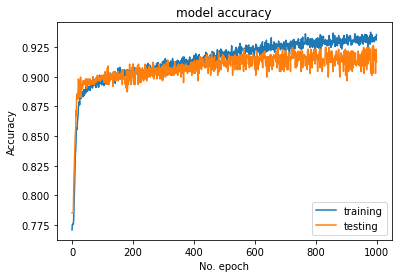

In [12]:
# plot learning curves
plt.plot(histories['starter'].history['accuracy'], label='training')
plt.plot(histories['starter'].history['val_accuracy'], label='testing')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.title("model accuracy")
plt.legend(loc="lower right")
plt.savefig('./%s/acc_vs_e.png'%(save_path))
plt.show()

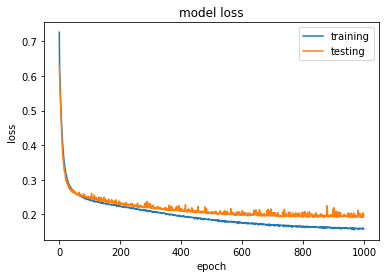

In [13]:
plt.plot(histories['starter'].history['loss'], label='training')
plt.plot(histories['starter'].history['val_loss'], label='testing')    
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("model loss")
plt.legend(loc='best')
plt.savefig('./%s/loss_vs_e.png'%(save_path))
plt.show()

In [14]:
print(histories['starter'].history['accuracy'][epochs-1])

0.9354838728904724


In [15]:
print(histories['starter'].history['val_accuracy'][epochs-1])

0.9122257232666016
